# Advance Plotting with Matplotlib and Seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/tips.csv')

print(df.shape)

df.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Univariate Plotting For Numerical Columns - Histogram, KDE, CDF and Box Plot

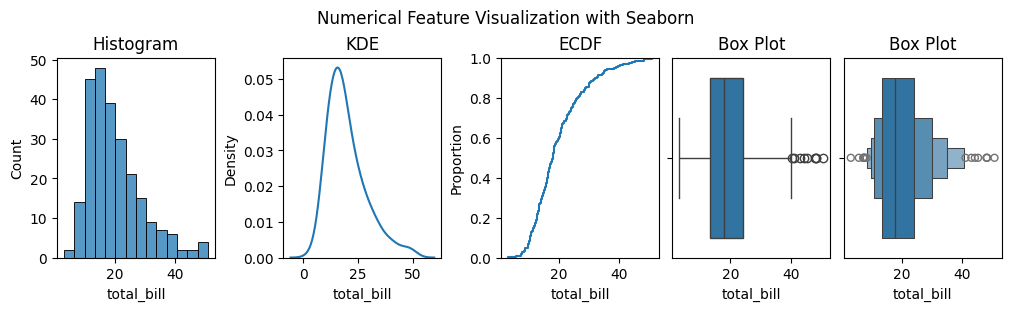

In [17]:
fig, axs = plt.subplots(1, 5, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical Feature Visualization with Seaborn")

axs[0].set_title("Histogram")
sns.histplot(data=df, x='total_bill', ax=axs[0])

axs[1].set_title("KDE")
sns.kdeplot(data=df, x='total_bill', ax=axs[1])

axs[2].set_title("ECDF")
sns.ecdfplot(data=df, x='total_bill', ax=axs[2])

axs[3].set_title("Box Plot")
sns.boxplot(data=df, x='total_bill', ax=axs[3])

axs[4].set_title("Box Plot")
sns.boxenplot(data=df, x='total_bill', ax=axs[4])

plt.show()

## Univariate Plotting For Categorical Columns - Count Plot

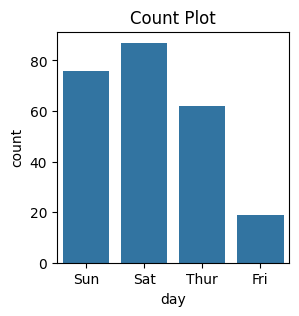

In [4]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Count Plot")
sns.countplot(data=df, x='day', ax=ax)

plt.show()

## Bivariate Plotting For Num vs Num Columns - Line Plot, Scatter Plot, Hexbin Plot, Heat Map and Pair Plot 

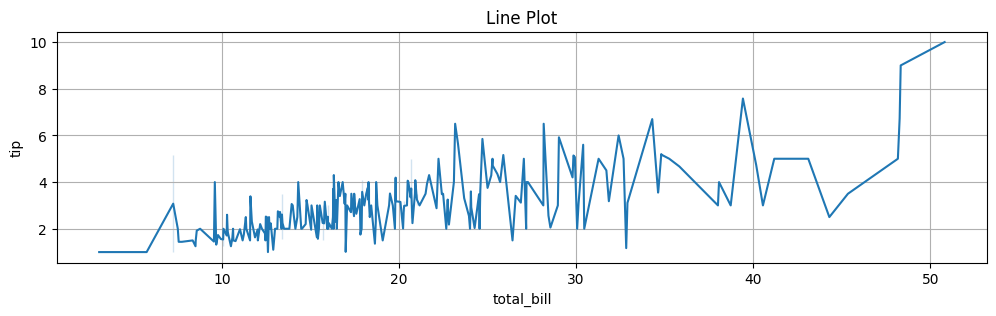

In [11]:
fig, ax = plt.subplots(figsize=(12,3))

ax.set_title("Line Plot")
sns.lineplot(data=df, x='total_bill', y='tip', ax=ax)

plt.grid(True)

plt.show()

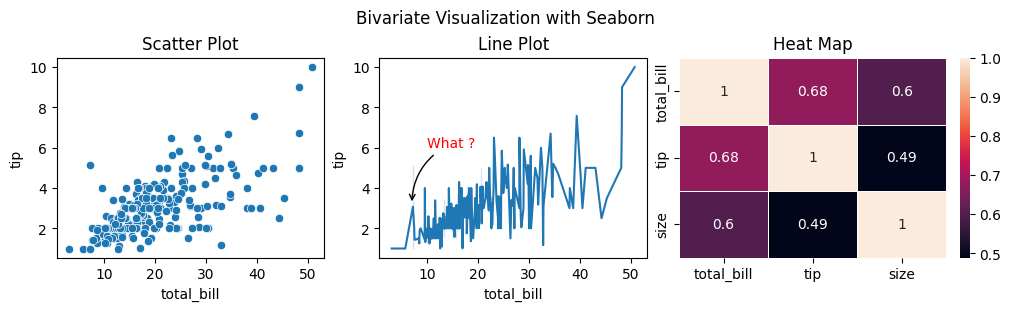

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Bivariate Visualization with Seaborn")

axs[0].set_title("Scatter Plot")
sns.scatterplot(data=df, x='total_bill', y='tip', ax=axs[0])

axs[1].set_title("Line Plot")
sns.lineplot(data=df, x='total_bill', y='tip', ax=axs[1])
axs[1].annotate("What ?", xytext=(10, 6), color="red", 
                xy=(7, 3.2), arrowprops={"arrowstyle":"->", "connectionstyle":"arc3, rad=0.3"})

axs[2].set_title("Heat Map")
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, linewidths=0.5, ax=axs[2])

plt.show()

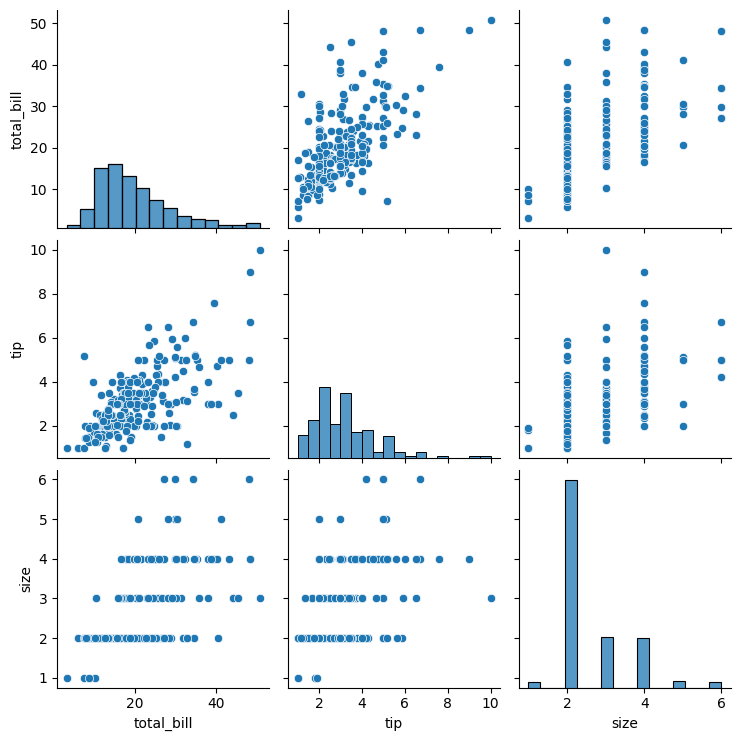

In [54]:
sns.pairplot(df)

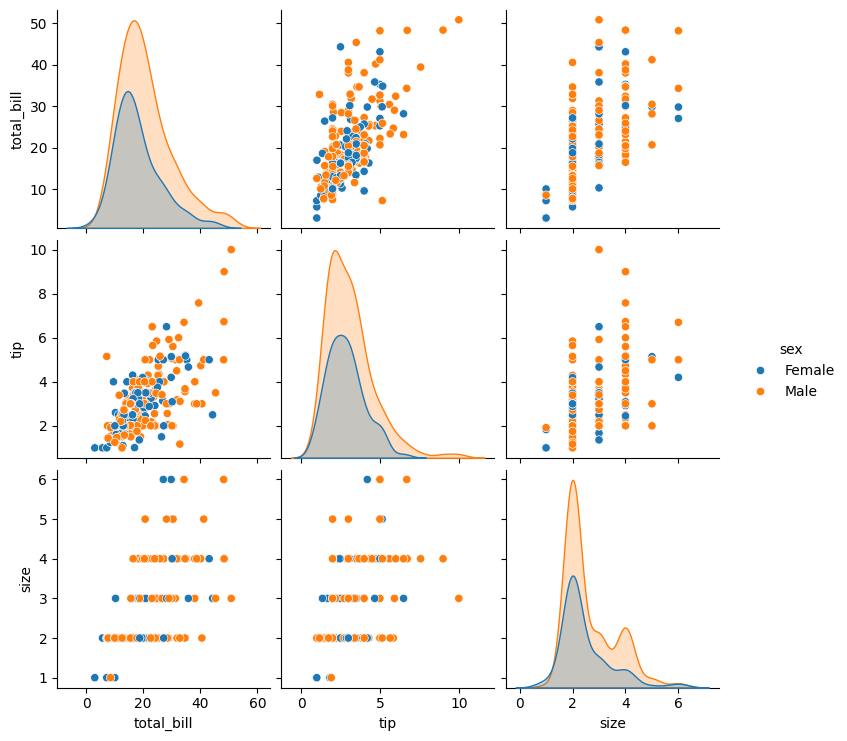

In [55]:
sns.pairplot(df, hue="sex")

## Bivariate Plotting For Num vs Categorical Columns - Box Plot, Violin Plot, Boxen Plot and Histogram Plot

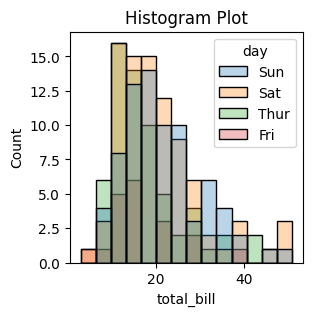

In [26]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Histogram Plot")
sns.histplot(data=df, x='total_bill', hue="day", alpha=0.3, ax=ax)

plt.show()

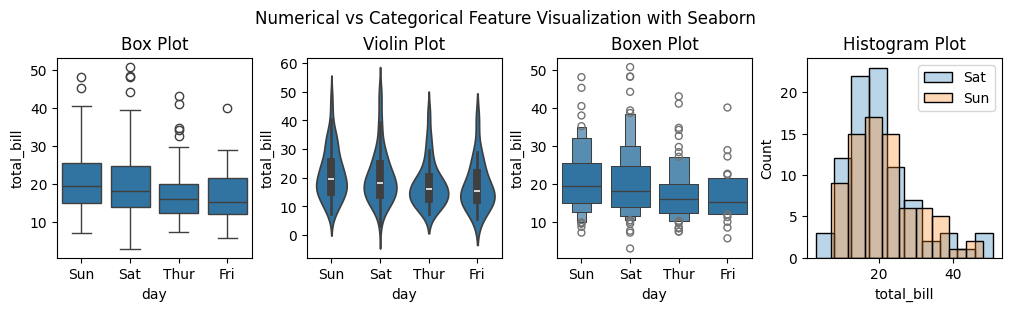

In [29]:
fig, axs = plt.subplots(1, 4, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical vs Categorical Feature Visualization with Seaborn")

axs[0].set_title("Box Plot")
sns.boxplot(data=df, x='day', y='total_bill', ax=axs[0])

axs[1].set_title("Violin Plot")
sns.violinplot(data=df, x='day', y='total_bill', ax=axs[1])

axs[2].set_title("Boxen Plot")
sns.boxenplot(data=df, x='day', y='total_bill', ax=axs[2])

axs[3].set_title("Histogram Plot")
sns.histplot(data=df.loc[df['day']=="Sat"], x='total_bill', alpha=0.3, ax=axs[3], label="Sat")
sns.histplot(data=df.loc[df['day']=="Sun"], x='total_bill', alpha=0.3, ax=axs[3], label="Sun")
axs[3].legend()

plt.show()

## Multi-plot Grid using FacetGrid

Let's answer this question:  
<b>Which gender pays more?</b>

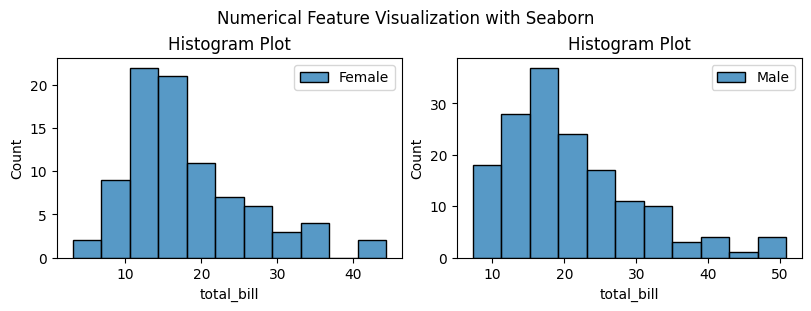

In [40]:
# Implementation without FacetGrid

fig, axs = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)
fig.suptitle("Numerical Feature Visualization with Seaborn")

axs[0].set_title("Histogram Plot")
sns.histplot(data=df.loc[df['sex']=='Female'], x='total_bill', ax=axs[0], label="Female")
axs[0].legend()

axs[1].set_title("Histogram Plot")
sns.histplot(data=df.loc[df['sex']=='Male'], x='total_bill', ax=axs[1], label="Male")
axs[1].legend()

plt.show()

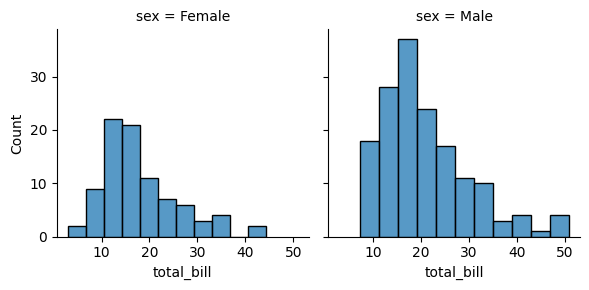

In [35]:
grid = sns.FacetGrid(df, col="sex")
grid.map(sns.histplot, "total_bill")

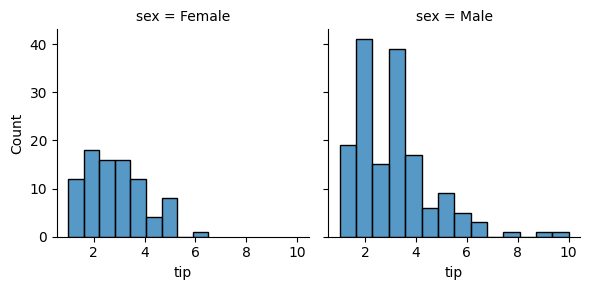

In [41]:
grid = sns.FacetGrid(df, col="sex")
grid.map(sns.histplot, "tip")

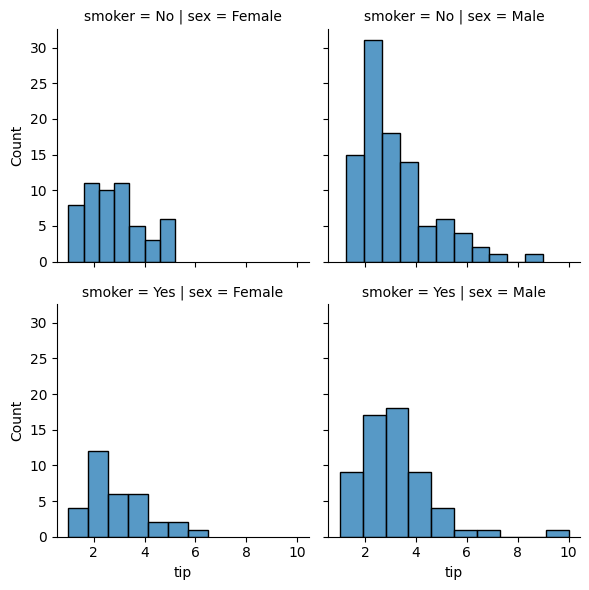

In [42]:
grid = sns.FacetGrid(df, col="sex", row="smoker")
grid.map(sns.histplot, "tip")

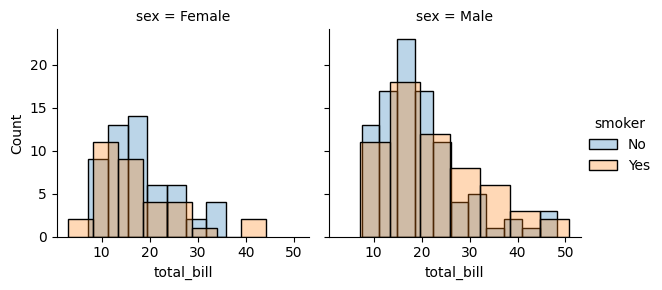

In [45]:
g = sns.FacetGrid(df, col="sex", hue="smoker")
g.map(sns.histplot, "total_bill", alpha=.3)
g.add_legend()

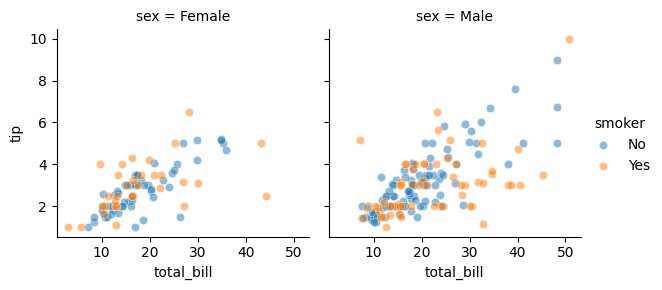

In [48]:
g = sns.FacetGrid(df, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.5)
g.add_legend()

## Bivariate Plotting For Cat vs Categorical Columns - Grouped Count Plot

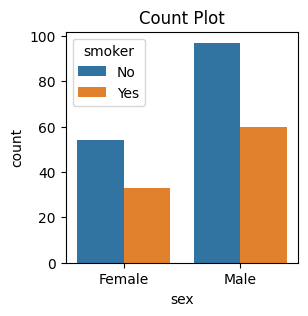

In [56]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("Count Plot")
sns.countplot(data=df, x='sex', hue='smoker', ax=ax)

plt.show()